In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

In [3]:
import os
import numpy as np 
import glob
import shutil
import matplotlib.pyplot as plt 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin = _URL, fname="flower_photos.tgz",extract= True)
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [6]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers','tulips']

In [7]:
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))




roses: 641 Images


Error: Destination path 'C:\Users\Somnath Paul\.keras\datasets\flower_photos\train\roses\10090824183_d02c613f10_m.jpg' already exists

In [12]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [13]:
print(len(train_dir))

57


In [15]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
directory= train_dir, shuffle=True, target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


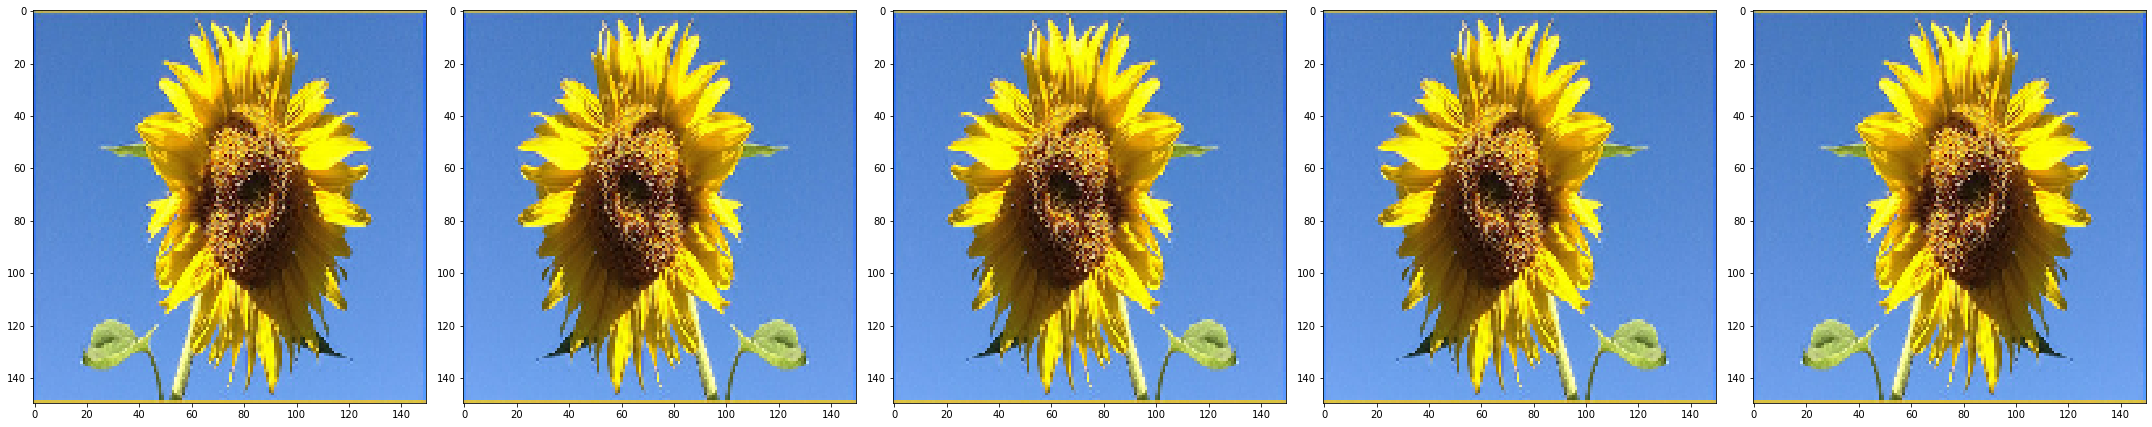

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=60)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory = train_dir, shuffle= True, target_size =(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


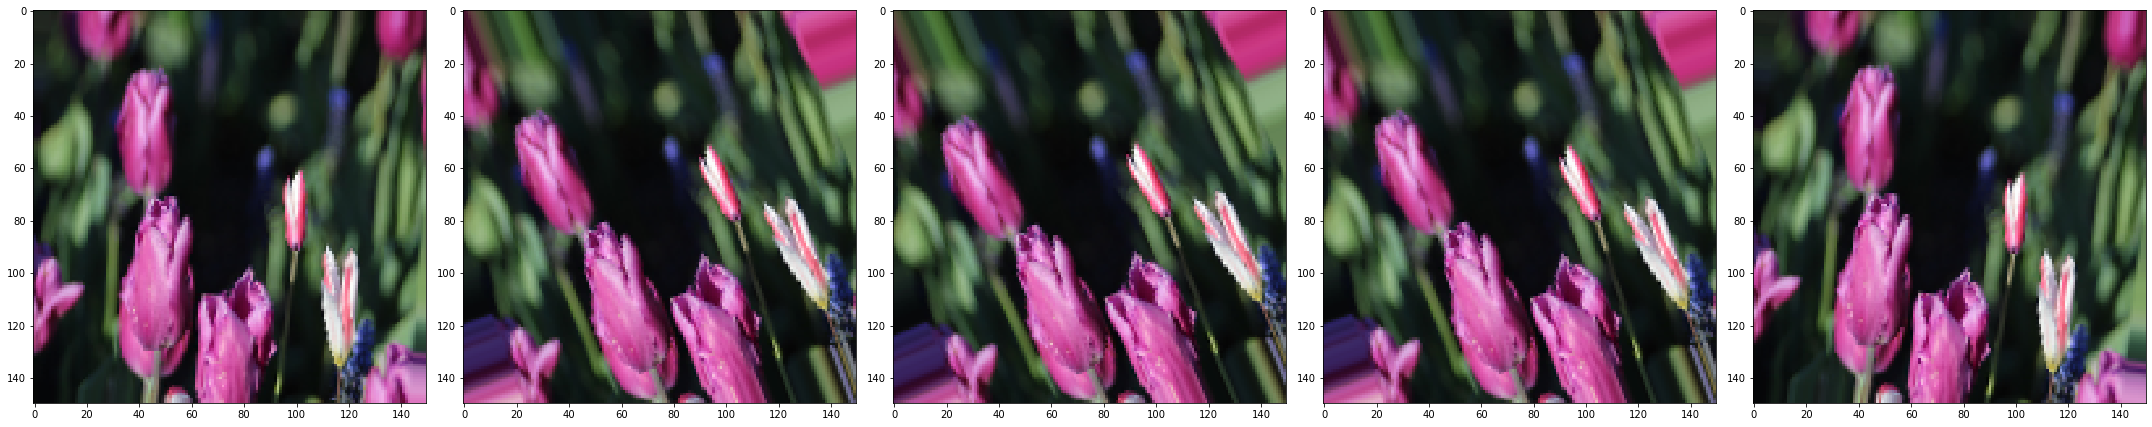

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory = train_dir, shuffle= True, target_size =(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


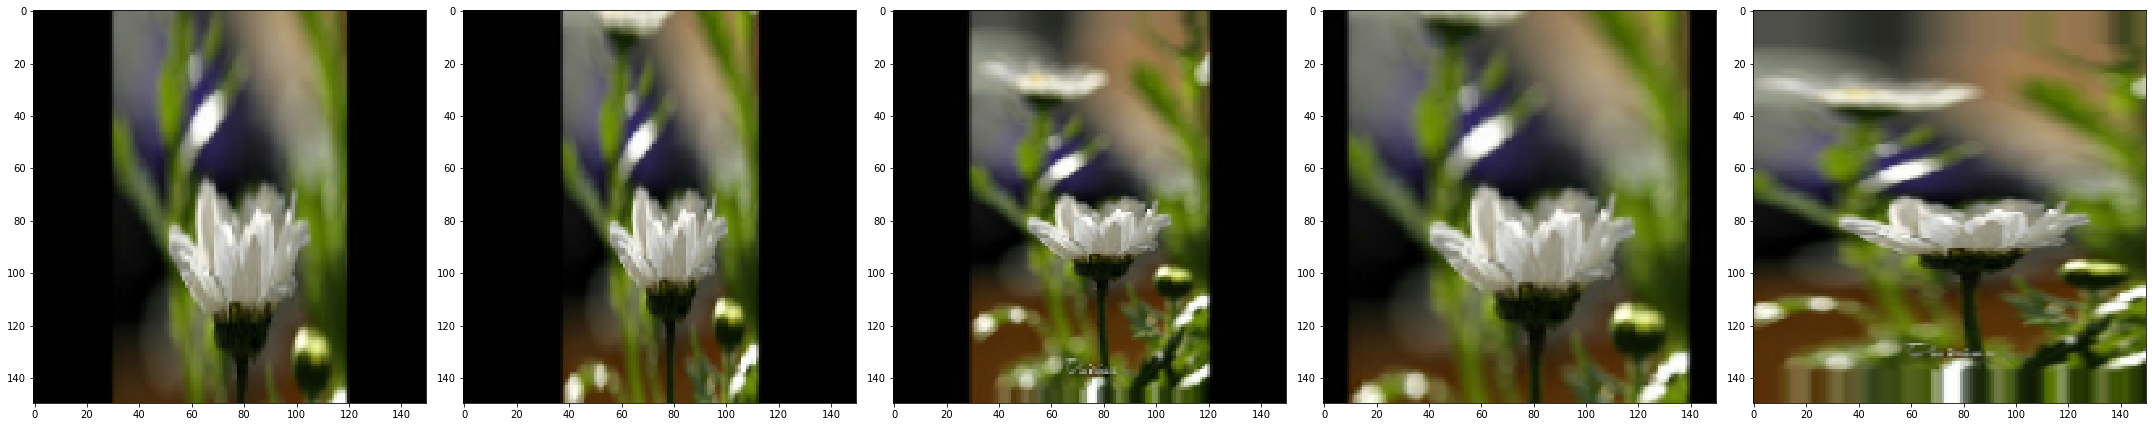

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory = train_dir, shuffle= True, target_size =(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


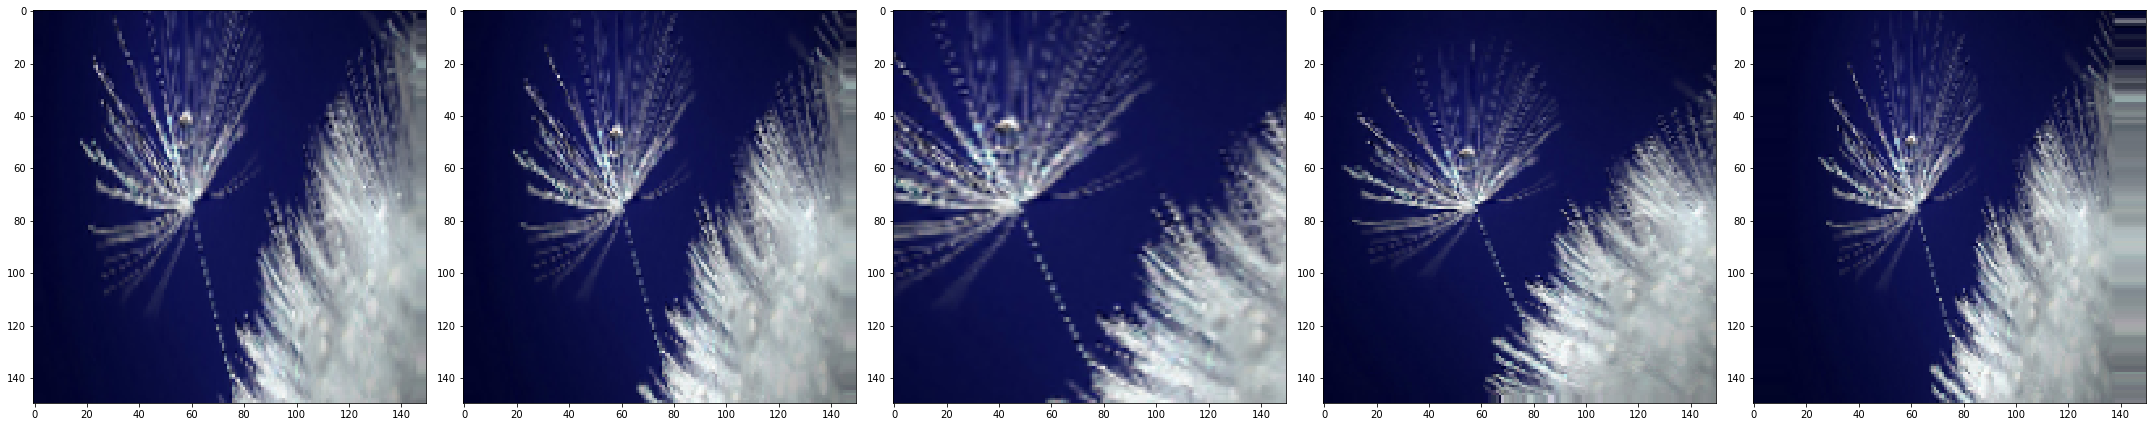

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [25]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory = val_dir,
    target_size =(IMG_SHAPE,IMG_SHAPE))

Found 735 images belonging to 5 classes.


In [1]:
som = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.MaxPool2D(2,2),

     tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

NameError: name 'tf' is not defined

In [28]:
som.compile(optimizer ='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
som.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [31]:
EPOCHs = 30
photo = som.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=EPOCHs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n/float(BATCH_SIZE)))
)

Epoch 1/30
30/30 [==============================] - 26s 850ms/step - loss: 0.4170 - accuracy: 0.8076 - val_loss: 0.3806 - val_accuracy: 0.8177
Epoch 2/30
30/30 [==============================] - 20s 676ms/step - loss: 0.3625 - accuracy: 0.8341 - val_loss: 0.3539 - val_accuracy: 0.8482
Epoch 3/30
30/30 [==============================] - 21s 694ms/step - loss: 0.3334 - accuracy: 0.8515 - val_loss: 0.2987 - val_accuracy: 0.8735
Epoch 4/30
30/30 [==============================] - 20s 679ms/step - loss: 0.3138 - accuracy: 0.8668 - val_loss: 0.3041 - val_accuracy: 0.8716
Epoch 5/30
30/30 [==============================] - 21s 716ms/step - loss: 0.2874 - accuracy: 0.8762 - val_loss: 0.2756 - val_accuracy: 0.8854
Epoch 6/30
30/30 [==============================] - 21s 711ms/step - loss: 0.2702 - accuracy: 0.8842 - val_loss: 0.2837 - val_accuracy: 0.8784
Epoch 7/30
30/30 [==============================] - 22s 748ms/step - loss: 0.2554 - accuracy: 0.8937 - val_loss: 0.2756 - val_accuracy: 0.8863

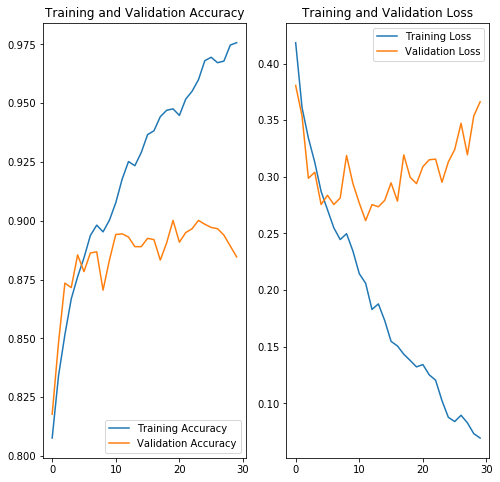

In [34]:
acc = photo.history['accuracy']
val_acc = photo.history['val_accuracy']

loss = photo.history['loss']
val_loss = photo.history['val_loss']

epochs_range = range(EPOCHs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()